Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008  

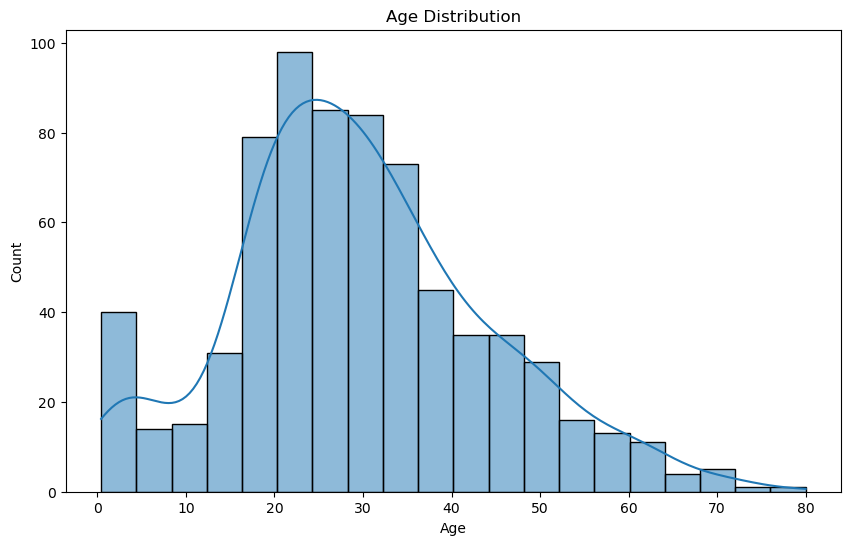

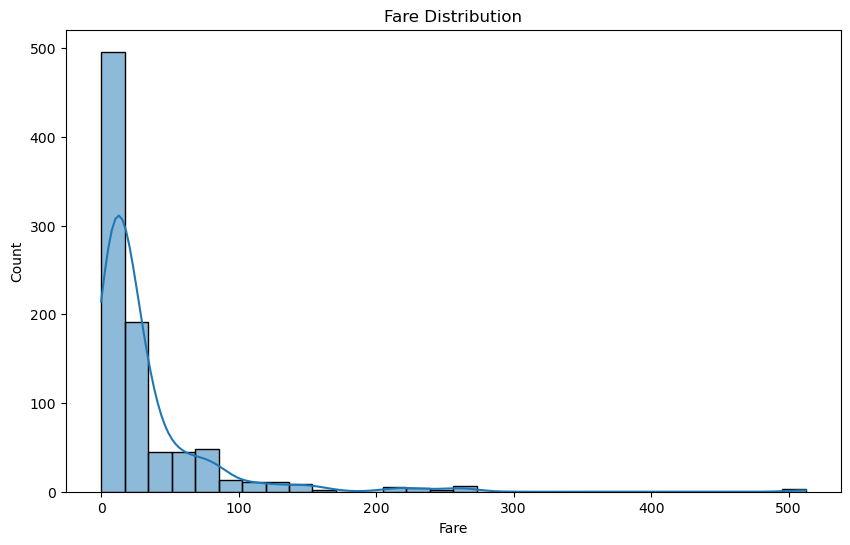

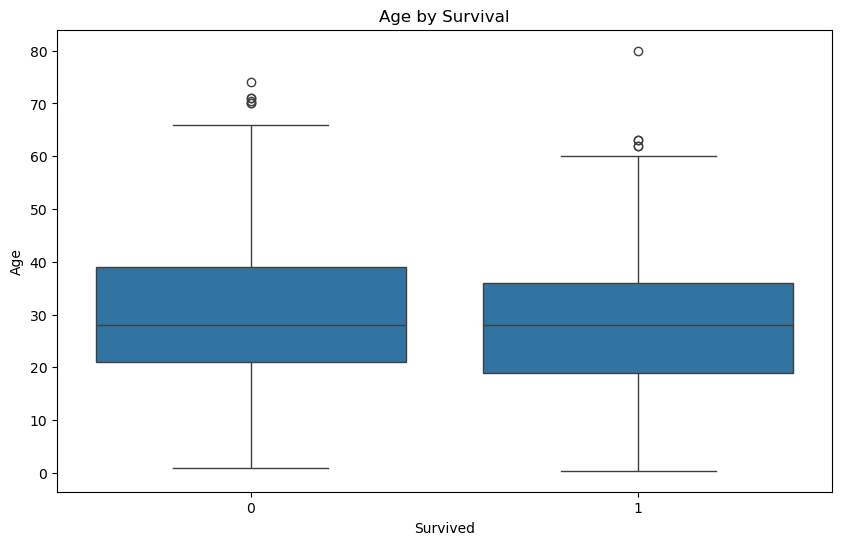

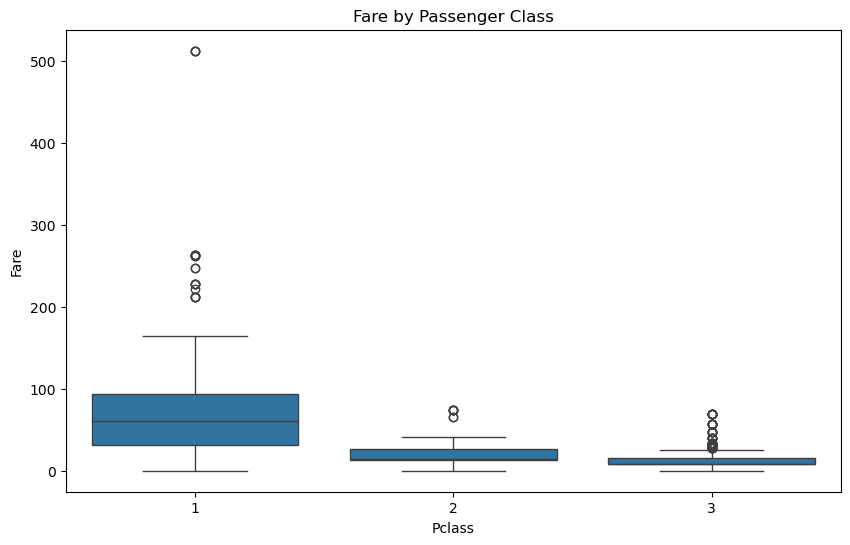

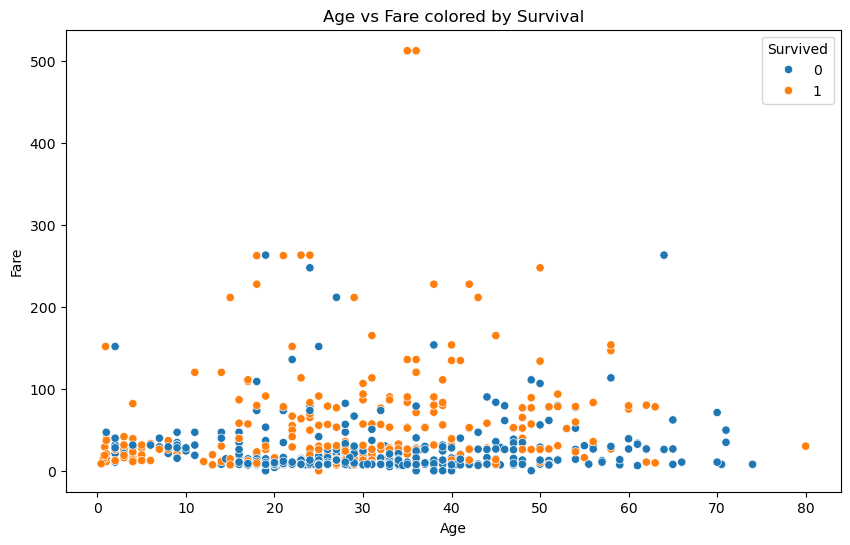

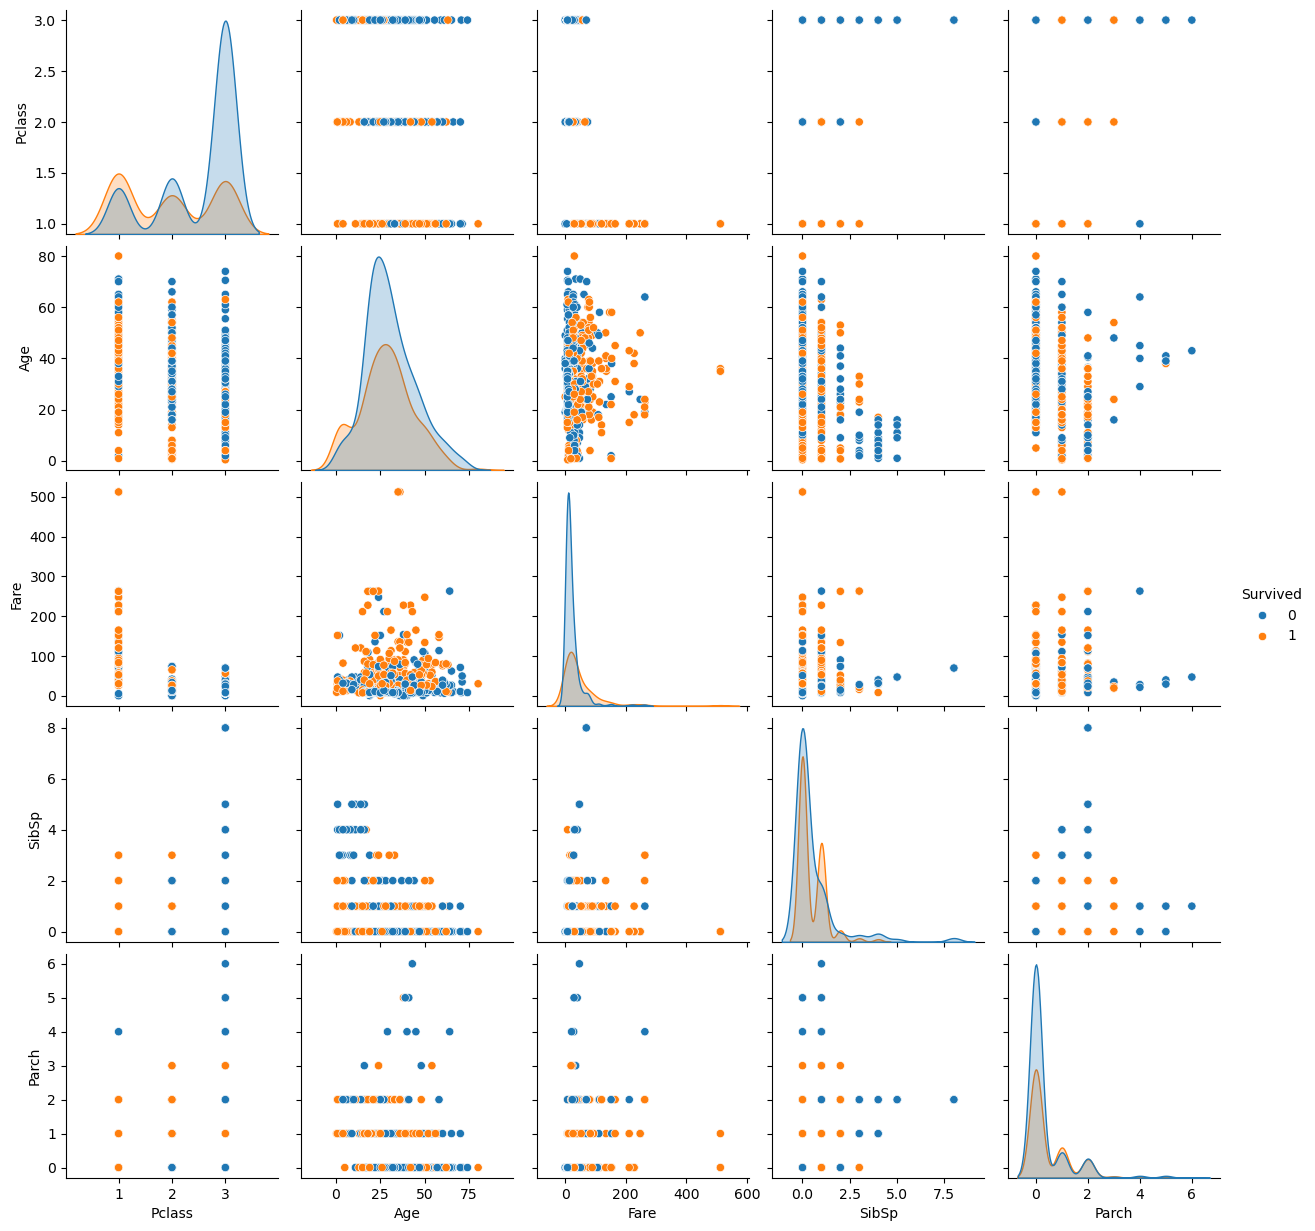

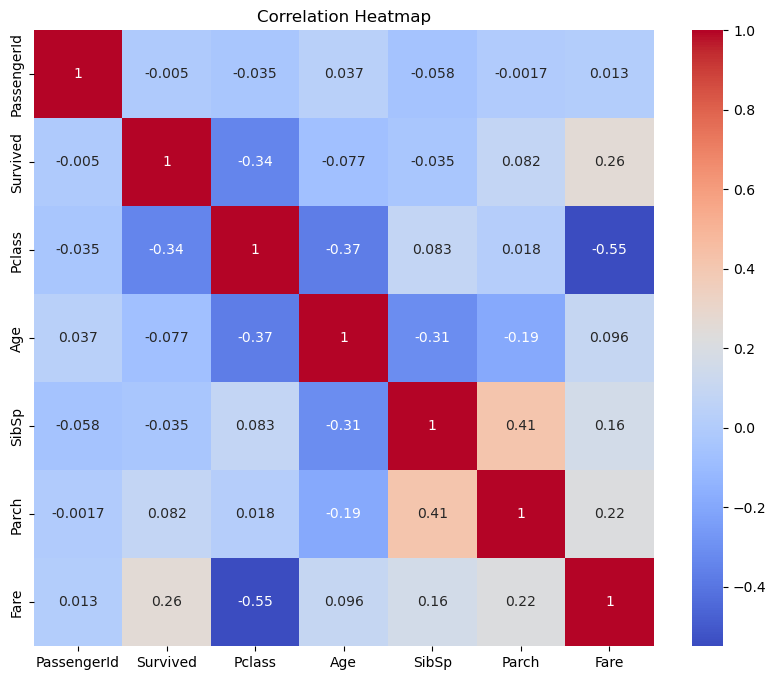


Identified Relations and Trends:
1. Survival is negatively correlated with Pclass (-0.34): Lower class numbers (higher status) have higher survival rates.
2. Fare positively correlated with Survival (0.26): Higher fares link to better survival, likely due to class.
3. Age has weak negative correlation with Survival (-0.08): Younger passengers slightly more likely to survive.
4. Females have higher survival rates than males (from value counts and potential crosstab).
5. Trends in histograms: Age is right-skewed (more young passengers), Fare is highly skewed with outliers.
6. Boxplots show older passengers in higher classes, higher fares in higher classes.
7. Scatterplots indicate no strong linear relation between Age and Fare, but clusters by survival.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display dataset info
print("Dataset Info:")
df.info()

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Value counts for categorical columns
print("\nValue Counts for Survived:")
print(df['Survived'].value_counts())
print("\nValue Counts for Pclass:")
print(df['Pclass'].value_counts())
print("\nValue Counts for Sex:")
print(df['Sex'].value_counts())
print("\nValue Counts for Embarked:")
print(df['Embarked'].value_counts())


# Correlation matrix for heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Visualizations

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Histogram for Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# Boxplot for Age by Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival')
plt.show()

# Boxplot for Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

# Scatterplot for Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare colored by Survival')
plt.show()

# Pairplot for selected columns
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identifying relations and trends (printed observations)
print("\nIdentified Relations and Trends:")
print("1. Survival is negatively correlated with Pclass (-0.34): Lower class numbers (higher status) have higher survival rates.")
print("2. Fare positively correlated with Survival (0.26): Higher fares link to better survival, likely due to class.")
print("3. Age has weak negative correlation with Survival (-0.08): Younger passengers slightly more likely to survive.")
print("4. Females have higher survival rates than males (from value counts and potential crosstab).")
print("5. Trends in histograms: Age is right-skewed (more young passengers), Fare is highly skewed with outliers.")
print("6. Boxplots show older passengers in higher classes, higher fares in higher classes.")
print("7. Scatterplots indicate no strong linear relation between Age and Fare, but clusters by survival.")
